In [451]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import pycountry_convert as pc

In [452]:
main_df = pd.read_csv('.//data_folder//Main_df.csv',index_col = 0)

<h1>Quick Data Overview </h1>

In [453]:
main_df.columns

Index(['City_x', 'State', 'Quality of Life Index', 'Purchasing Power Index',
       'Safety Index', 'Health Care Index', 'Cost of Living Index',
       'Property Price to Income Ratio', 'Traffic Commute Time Index',
       'Pollution Index', 'Country Code', 'pop_thou', 'avg_5_yr_growth_thou',
       'Percent Fertile', 'chrstpct', 'judpct', 'islmpct', 'budpct', 'zorpct',
       'hinpct', 'sikhpct', 'shntpct', 'bahpct', 'taopct', 'jainpct', 'conpct',
       'synpct', 'anmpct', 'nonpct', 'othrpct', 'sumpct', 'Country', 'City_y',
       'AvgTemperature', 'pct_lt_sec', 'pct_some_sec', 'pct_some_ter'],
      dtype='object')

In [454]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 275 entries, 0 to 274
Data columns (total 37 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   City_x                          275 non-null    object 
 1   State                           275 non-null    object 
 2   Quality of Life Index           275 non-null    float64
 3   Purchasing Power Index          275 non-null    float64
 4   Safety Index                    275 non-null    float64
 5   Health Care Index               275 non-null    float64
 6   Cost of Living Index            275 non-null    float64
 7   Property Price to Income Ratio  275 non-null    float64
 8   Traffic Commute Time Index      275 non-null    float64
 9   Pollution Index                 275 non-null    float64
 10  Country Code                    275 non-null    object 
 11  pop_thou                        275 non-null    float64
 12  avg_5_yr_growth_thou            275 

In [455]:
main_df.describe()

,Quality of Life Index,Purchasing Power Index,Safety Index,Health Care Index,Cost of Living Index,Property Price to Income Ratio,Traffic Commute Time Index,Pollution Index,pop_thou,avg_5_yr_growth_thou,...,conpct,synpct,anmpct,nonpct,othrpct,sumpct,AvgTemperature,pct_lt_sec,pct_some_sec,pct_some_ter
count,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,...,275.000000,275.000000,275.000000,275.000000,275.000000,275.0,275.000000,275.000000,275.000000,275.000000
mean,142.292076,84.314242,59.077584,68.738171,59.953863,11.187475,38.815119,47.040302,5305.592727,520.807273,...,0.000050,0.023308,0.005769,0.121835,0.010182,0.0,56.061047,0.133745,0.353818,0.317545
std,45.286354,30.333208,13.173133,8.767906,22.395590,8.737169,8.411984,23.912033,7034.214809,848.010938,...,0.000102,0.095457,0.011040,0.085423,0.021140,0.0,15.877697,0.119515,0.083077,0.201897
min,-23.305000,24.610000,22.056667,31.187500,20.365000,3.186364,20.392941,12.471765,357.000000,-47.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,2.605111,0.005000,0.205000,0.035000
25%,112.665302,56.420000,52.921667,63.273889,40.730000,6.193333,32.722000,25.652778,804.000000,46.000000,...,0.000000,0.000100,0.000200,0.027200,0.001000,0.0,43.825658,0.035000,0.305000,0.105000
50%,160.775000,90.100000,59.920000,70.893333,66.670000,8.507500,37.845556,38.594444,2476.000000,185.000000,...,0.000000,0.000300,0.002100,0.154200,0.001000,0.0,54.195921,0.075000,0.355000,0.330000
75%,175.904444,110.258333,66.550000,74.818036,79.174444,12.585556,43.708611,69.916308,5966.000000,498.000000,...,0.000100,0.000800,0.002400,0.164300,0.005500,0.0,70.365271,0.210000,0.355000,0.545000
max,226.207059,133.804706,84.666667,83.720000,113.034118,45.253333,64.247222,94.102500,37719.000000,3796.000000,...,0.000900,0.420000,0.071200,0.411000,0.067300,0.0,82.847021,0.450000,0.700000,0.545000


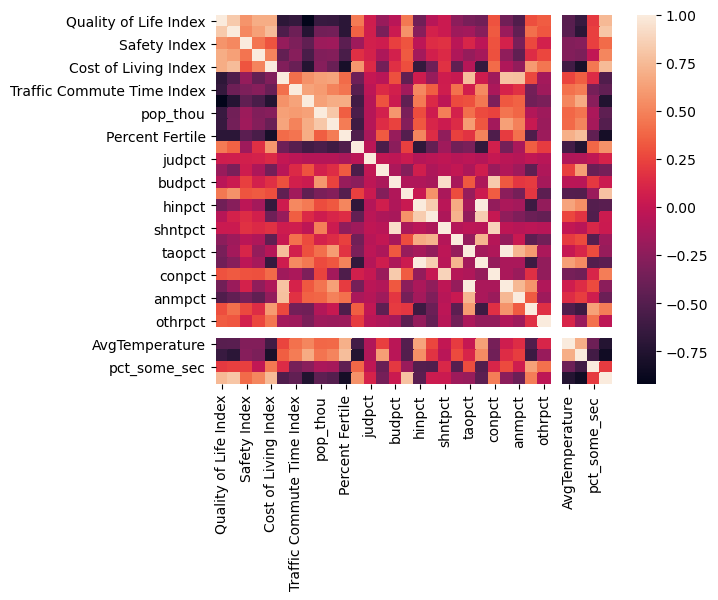

In [456]:
sns.heatmap(main_df.corr())
plt.show()

Looking at the sumpct column it is all 0, so it is not useful

In [457]:
main_df.sumpct.describe()

count    275.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
Name: sumpct, dtype: float64

In [458]:
drop_features = []
drop_features.append('sumpct')

<h1>Exploratory Data Analysis (Removing Correlated Features)</h1>

K:\Anaconda\lib\site-packages\pandas\plotting\_matplotlib\misc.py:80: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])
K:\Anaconda\lib\site-packages\pandas\plotting\_matplotlib\misc.py:81: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  ax.set_ylim(boundaries_list[i])
K:\Anaconda\lib\site-packages\pandas\plotting\_matplotlib\misc.py:71: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[i])


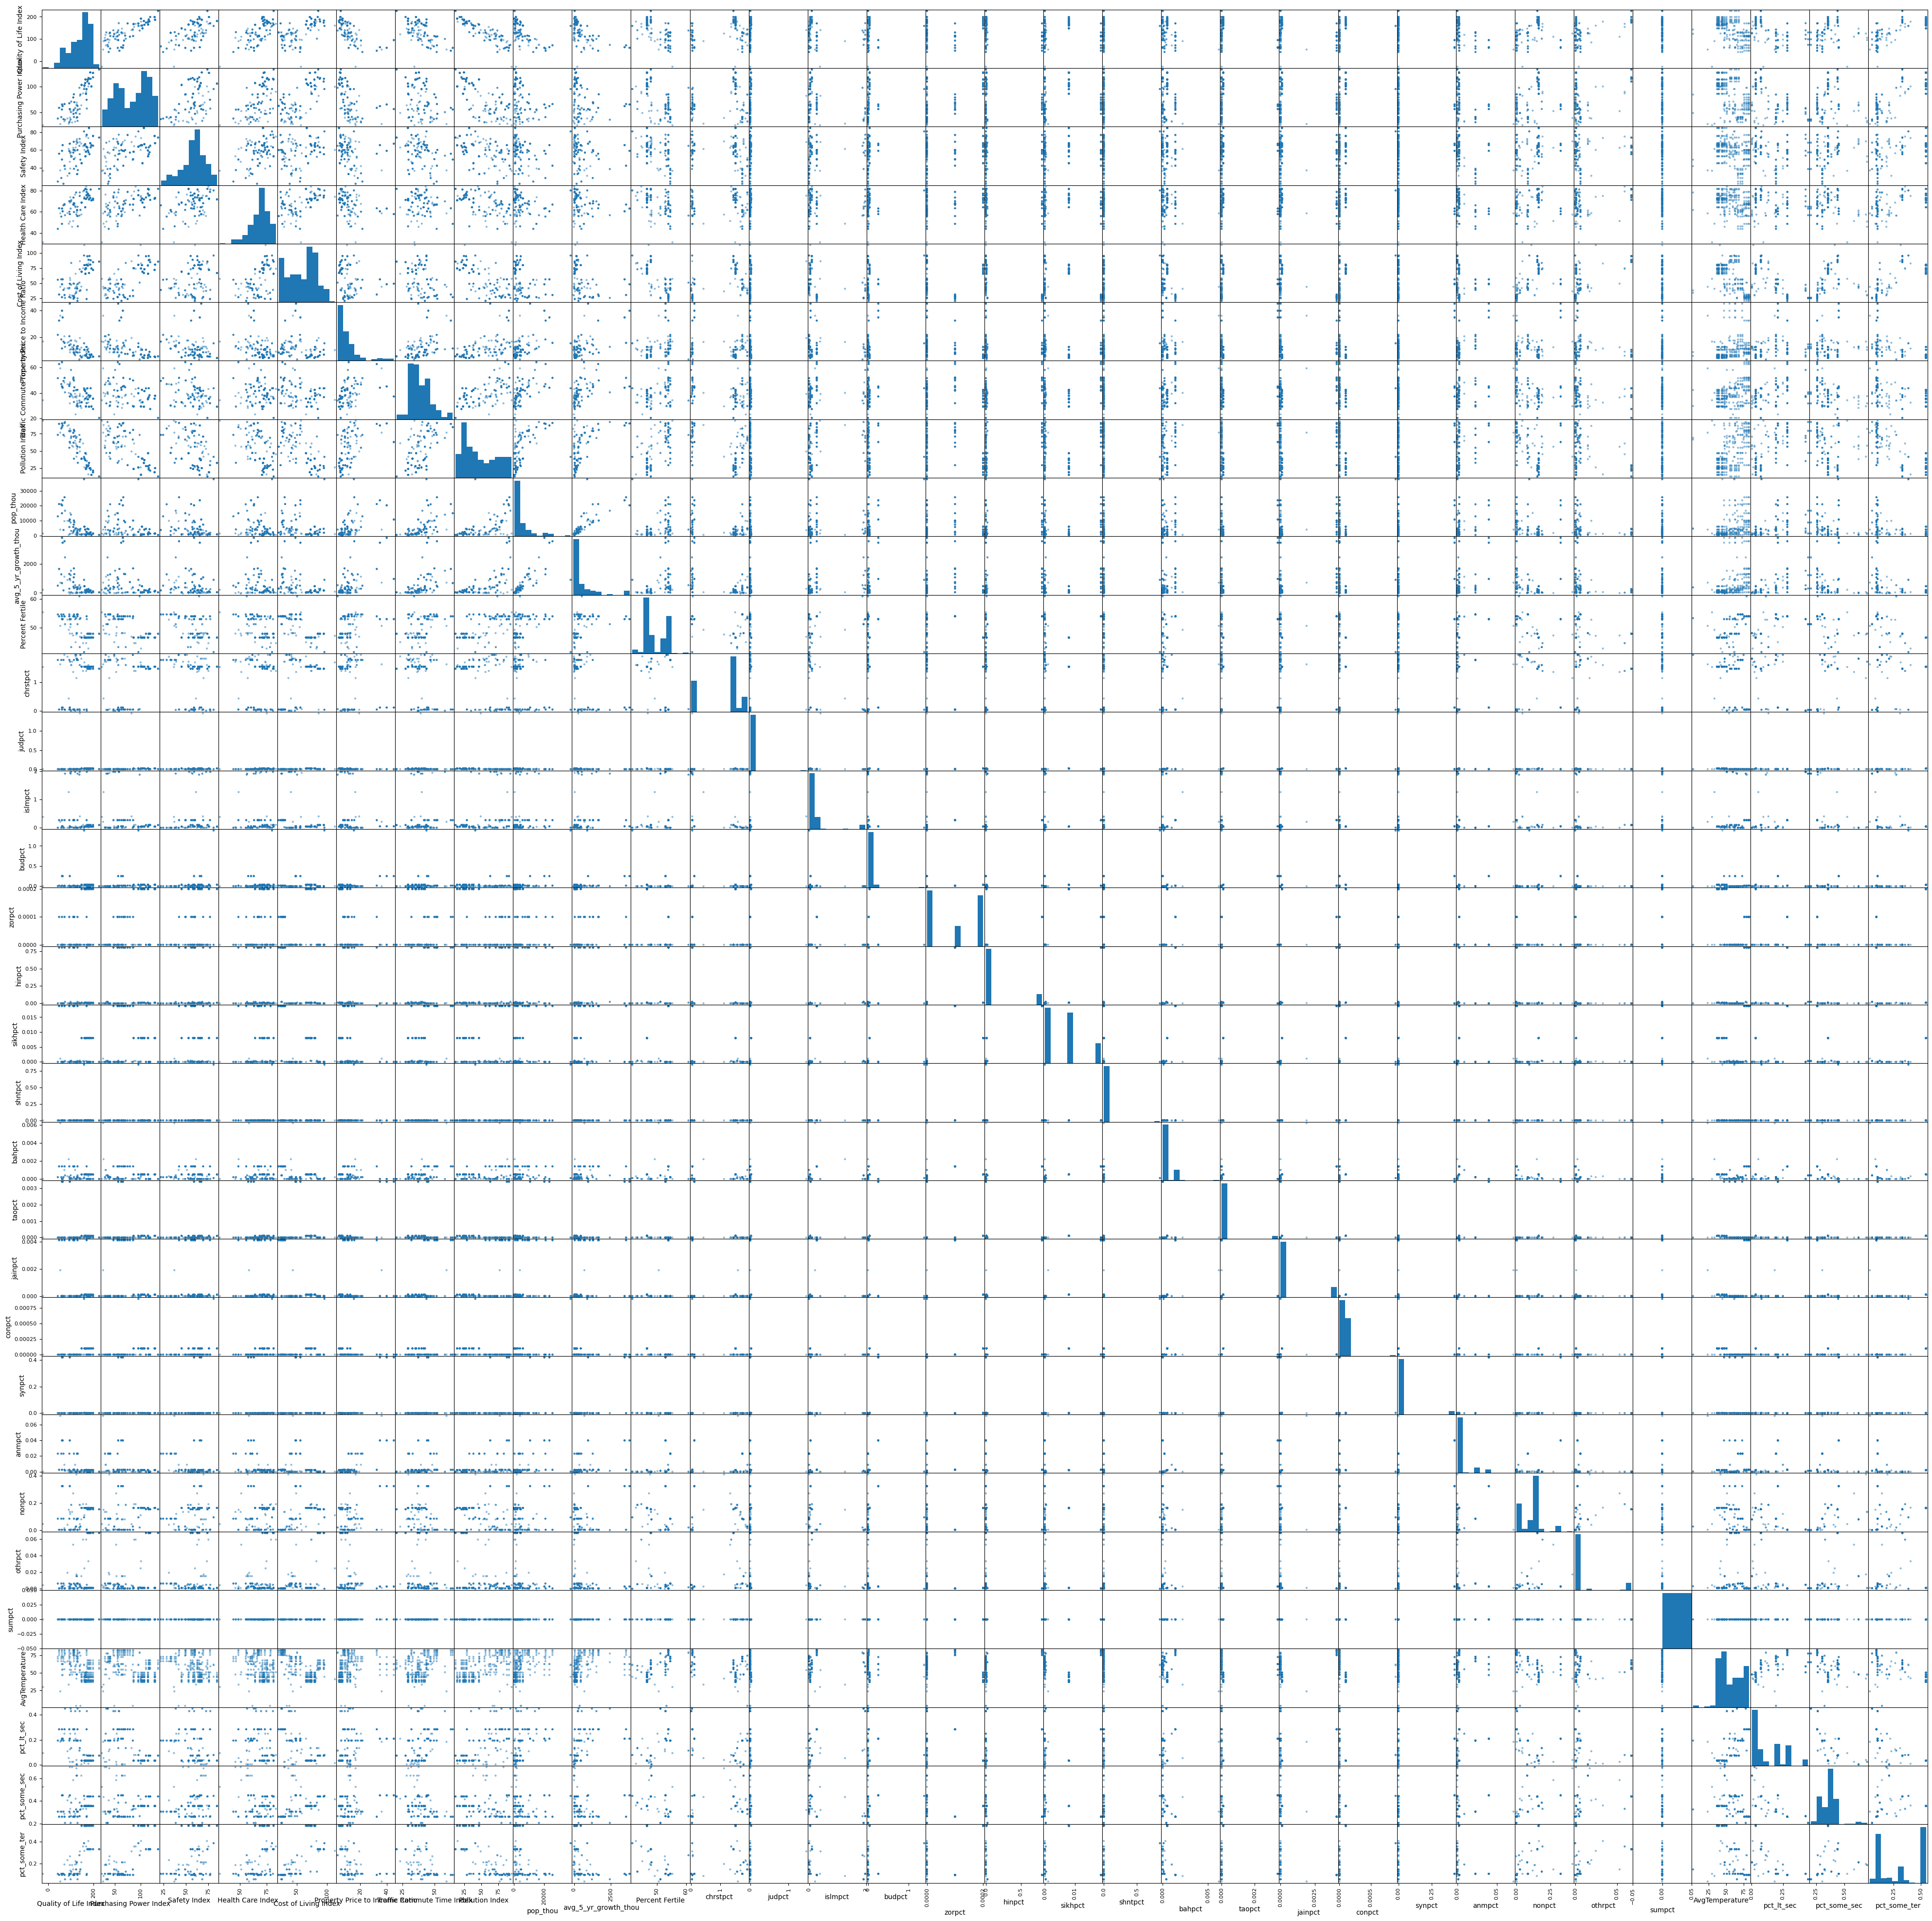

In [459]:
scatter_matrix(main_df,figsize = (50,50));
plt.show()

Looks like a few of the features are correlated heavily with QOL. Lets look at those features

In [460]:
correlated_features = set()
correlation_matrix = main_df.corr()
for j in range(len(correlation_matrix.columns)):
    if abs(correlation_matrix.iloc[0, j]) > 0.8:
        colname = correlation_matrix.columns[j]
        correlated_features.add(colname)

In [461]:
correlated_features.add(correlation_matrix.columns[0])
main_df[correlated_features].corr()

,Purchasing Power Index,Pollution Index,Quality of Life Index
Purchasing Power Index,1.000000,-0.728326,0.831482
Pollution Index,-0.728326,1.000000,-0.921050
Quality of Life Index,0.831482,-0.921050,1.000000


The "Pollution Index" and "Purchasing Power Index" features can be dropped without losing too much information

In [462]:
drop_features.extend(['Purchasing Power Index','Pollution Index'])

Many of the religions are also correlated

In [463]:
religion_features = [x for x in main_df.columns if x.find('pct') != -1 and x.find('_') == -1]
correlated_features = list()
correlation_matrix = main_df[religion_features].corr()
for i in range(len(correlation_matrix)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname = correlation_matrix.columns[j]
            colname2 = correlation_matrix.columns[i]
            correlated_features.append([colname,colname2,correlation_matrix.iloc[i, j]])

In [464]:
correlated_features

[['hinpct', 'sikhpct', 0.8371538746805592],
 ['budpct', 'shntpct', 0.929885264419142],
 ['hinpct', 'jainpct', 0.9969197193895927],
 ['sikhpct', 'jainpct', 0.8438194337589328],
 ['budpct', 'conpct', 0.8326910444787274],
 ['shntpct', 'conpct', 0.8771334450362299],
 ['taopct', 'synpct', 0.9982198741830224]]

It looks look percent hindoism is correlated with sikhism and jainism. This makes sense since most of these religions are allpopular in asian countries. Similarly, buddism is correlated with shintoism and conpct.

In [465]:
drop_features.extend(['sikhpct','jainpct','conpct','shntpct','synpct'])

In [466]:
Lets look at all remaining possible correlations:

SyntaxError: invalid syntax (<ipython-input-466-2cb47172d468>, line 1)

In [467]:
correlated_features = list()
correlation_matrix = main_df[[x for x in main_df.columns if x not in religion_features and x not in drop_features]].corr()
for i in range(len(correlation_matrix)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname = correlation_matrix.columns[j]
            colname2 = correlation_matrix.columns[i]
            print('Feature 1: ' + colname + ', Feature 2: ' + colname2)
            print('Correlation Coeffcient =',round(correlation_matrix.iloc[i, j],4))
            print()

Feature 1: pop_thou, Feature 2: avg_5_yr_growth_thou
Correlation Coeffcient = 0.8165

Feature 1: Percent Fertile, Feature 2: pct_some_ter
Correlation Coeffcient = -0.8151

Feature 1: pct_lt_sec, Feature 2: pct_some_ter
Correlation Coeffcient = -0.8371



Since we are trying to predict changes in population growth, it will be important to keep the population in thousands since they are correlated.

Percent Fertile is negatively correlated with tertiary education percentage. This is probably due to do with an older population having more time to get degrees and my actually provide different information.

The percent secondary though also negativelty correlates with teritary education and probably better captures the same information. Therefore we can probably drop the percent some tertiary column.

In [468]:
drop_features.append('pct_some_ter')

Now lets look at correlation one more time:

In [470]:
correlated_features = list()
correlation_matrix = main_df[[x for x in main_df.columns if x not in religion_features and x not in drop_features]].corr()
for i in range(len(correlation_matrix)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname = correlation_matrix.columns[j]
            colname2 = correlation_matrix.columns[i]
            print('Feature 1: ' + colname + ', Feature 2: ' + colname2)
            print('Correlation Coeffcient =',round(correlation_matrix.iloc[i, j],4))
            print()

Feature 1: pop_thou, Feature 2: avg_5_yr_growth_thou
Correlation Coeffcient = 0.8165



It looks like the only correlation left is between a feature and what we are trying to predict.

Before doing any more feature analysis it will be useful to convert average population growth into percentage population growth.

In [471]:
main_df['avg_5_yr_pct_growth'] = main_df['avg_5_yr_growth_thou']/main_df['pop_thou']
drop_features.append('avg_5_yr_growth_thou')

<h1> Encoding <h1>

There are many countries with only 1 or 2 cities in it, so it might be useful to categorize them by continent in the case that there happens to be a difference between regions.

In [472]:
main_df['Country Code'].value_counts()

CAN    110
IND     44
AUS     30
BRA     24
CHN     15
TUR      8
PAK      6
MEX      6
POL      5
ITA      4
JPN      3
UKR      2
SAU      2
BEL      2
COL      2
ARG      1
ISR      1
NOR      1
GRC      1
BLR      1
PER      1
MNG      1
KEN      1
FIN      1
JOR      1
HUN      1
ALB      1
Name: Country Code, dtype: int64

In [473]:
def country_code_to_continent(code):
    return pc.country_alpha2_to_continent_code(pc.country_alpha3_to_country_alpha2(code))

In [474]:
main_df['Continent'] = main_df['Country Code'].apply(lambda x: country_code_to_continent(x))

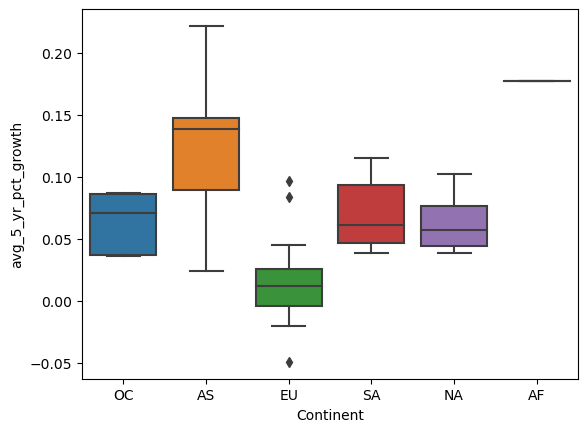

In [475]:
sns.boxplot(data = main_df, x = 'Continent', y = 'avg_5_yr_pct_growth')
plt.show()

It seems as though there is a large variation in mean growth dependent on the continent.

It will be helpful to one-hot encode these.

In [476]:
continent_list = list(main_df['Continent'].unique())
for continent in continent_list:
    main_df[continent] = (main_df['Continent'] == continent).astype(int)

At this point we no longer need the city columns, since that does not really give us any generalizable information.

In [478]:
drop_features.extend(['City_x','City_y'])

Most of the religions are more categorical or nearly constant. Thus it is best to drop the nearly constant ones and classify the rest.

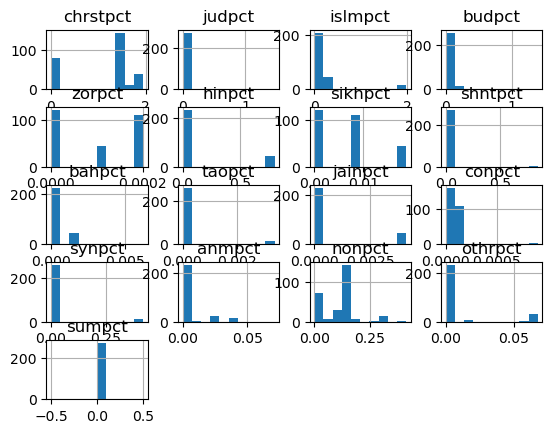

In [479]:
main_df[religion_features].hist()
plt.show()

In [480]:
for col in religion_features:
    main_df[col] = (main_df[col]>main_df[col].mean()).astype(int)

In [481]:
for col in religion_features:
    if (main_df[col].value_counts().min()/main_df[col].count())<.1:
        drop_features.append(col)

<h1> EDA with simple Linear Regression </h1>

lets look at 'Quality of Life Index','Safety Index','Health Care Index','Cost of Living Index','Property Price to Income Ratio', and 'Traffic Commute Time Index' and see if there is any kind of relationship to the 'avg_5_yr_pct_growth'.

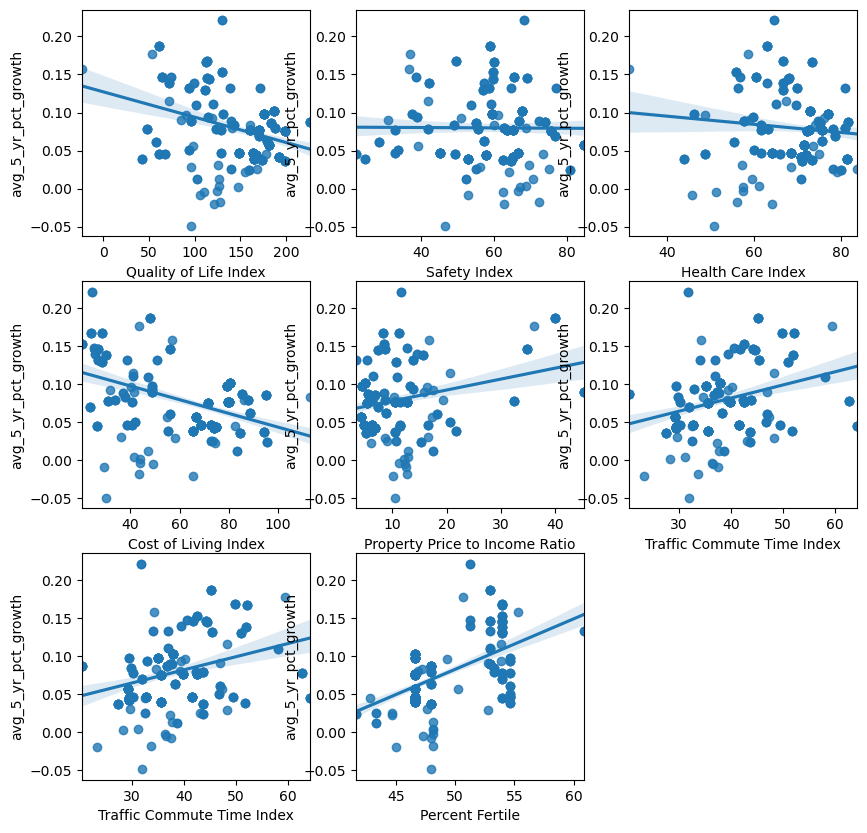

In [482]:
f = plt.figure(figsize = (10,10))
feature_list = ['Quality of Life Index','Safety Index','Health Care Index','Cost of Living Index','Property Price to Income Ratio','Traffic Commute Time Index']
i = 1
for feature in feature_list:
    sns.regplot(data = main_df, x = feature, y = 'avg_5_yr_pct_growth', ax = plt.subplot(3,3,i))
    i+=1
sns.regplot(data = main_df, x = 'Traffic Commute Time Index', y = 'avg_5_yr_pct_growth', ax = plt.subplot(3,3,i))
i+=1
sns.regplot(data = main_df, x = 'Percent Fertile', y = 'avg_5_yr_pct_growth', ax = plt.subplot(3,3,i))
plt.show()

In [483]:
main_df[['avg_5_yr_pct_growth','Safety Index']].corr()

,avg_5_yr_pct_growth,Safety Index
avg_5_yr_pct_growth,1.000000,-0.006992
Safety Index,-0.006992,1.000000


The Safety Index seems to have no correlation with 'avg_5_yr_pct_growth'.

In [485]:
drop_features.append('Safety Index')

The continent regionality captures most of the variation in 'avg_5_yr_pct_growth'.

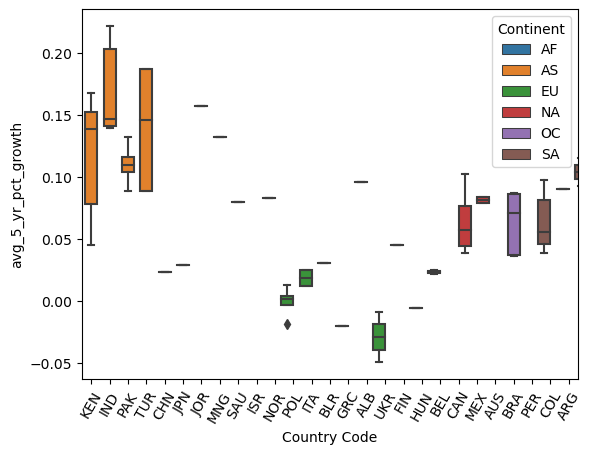

In [486]:
ax = sns.boxplot(data = main_df.sort_values('Continent'), x = 'Country Code', y = 'avg_5_yr_pct_growth', hue = 'Continent',width=4)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 60)
plt.show()

In [487]:
drop_features.append('Country Code')

In [488]:
main_df[['avg_5_yr_pct_growth','pop_thou']].corr()

,avg_5_yr_pct_growth,pop_thou
avg_5_yr_pct_growth,1.000000,0.309072
pop_thou,0.309072,1.000000


<h1> Untouched Data</h1>

The 'pct_some_sec' and 'pct_lt_sec' data seem to be in good shape already without alteration.

In [489]:
main_df[['avg_5_yr_pct_growth','pct_some_sec','pct_lt_sec']].corr()

,avg_5_yr_pct_growth,pct_some_sec,pct_lt_sec
avg_5_yr_pct_growth,1.000000,-0.455310,0.602369
pct_some_sec,-0.455310,1.000000,-0.590869
pct_lt_sec,0.602369,-0.590869,1.000000


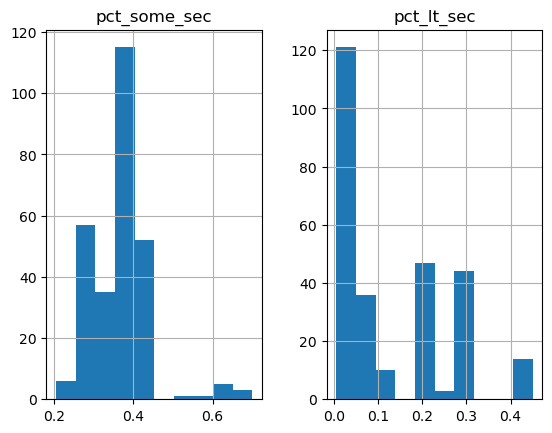

In [490]:
main_df[['pct_some_sec','pct_lt_sec']].hist()
plt.show()

In [491]:
drop_features.append('Continent')
drop_features.append('State')
main_df.drop(columns = set(drop_features), inplace = True)

,State,Quality of Life Index,Health Care Index,Cost of Living Index,Property Price to Income Ratio,Traffic Commute Time Index,pop_thou,Percent Fertile,chrstpct,judpct,...,AvgTemperature,pct_lt_sec,pct_some_sec,avg_5_yr_pct_growth,OC,AS,EU,SA,NA,AF
0,None,199.101765,71.123529,84.723529,5.124118,27.401176,1265.0,47.940359,1,0,...,68.072491,0.075,0.44,0.036364,1,0,0,0,0,0
1,None,199.101765,71.123529,84.723529,5.124118,27.401176,1265.0,47.940359,1,0,...,55.579689,0.075,0.44,0.036364,1,0,0,0,0,0
2,None,199.101765,71.123529,84.723529,5.124118,27.401176,1265.0,47.940359,1,0,...,64.719404,0.075,0.44,0.036364,1,0,0,0,0,0
3,None,199.101765,71.123529,84.723529,5.124118,27.401176,1265.0,47.940359,1,0,...,62.250626,0.075,0.44,0.036364,1,0,0,0,0,0
4,None,199.101765,71.123529,84.723529,5.124118,27.401176,1265.0,47.940359,1,0,...,57.549255,0.075,0.44,0.036364,1,0,0,0,0,0


In [492]:
main_df.head()

,Quality of Life Index,Health Care Index,Cost of Living Index,Property Price to Income Ratio,Traffic Commute Time Index,pop_thou,Percent Fertile,chrstpct,judpct,islmpct,...,AvgTemperature,pct_lt_sec,pct_some_sec,avg_5_yr_pct_growth,OC,AS,EU,SA,NA,AF
0,199.101765,71.123529,84.723529,5.124118,27.401176,1265.0,47.940359,1,0,0,...,68.072491,0.075,0.44,0.036364,1,0,0,0,0,0
1,199.101765,71.123529,84.723529,5.124118,27.401176,1265.0,47.940359,1,0,0,...,55.579689,0.075,0.44,0.036364,1,0,0,0,0,0
2,199.101765,71.123529,84.723529,5.124118,27.401176,1265.0,47.940359,1,0,0,...,64.719404,0.075,0.44,0.036364,1,0,0,0,0,0
3,199.101765,71.123529,84.723529,5.124118,27.401176,1265.0,47.940359,1,0,0,...,62.250626,0.075,0.44,0.036364,1,0,0,0,0,0
4,199.101765,71.123529,84.723529,5.124118,27.401176,1265.0,47.940359,1,0,0,...,57.549255,0.075,0.44,0.036364,1,0,0,0,0,0
